In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [4]:
train.isnull().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
train.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
train.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [7]:
train["cut"].value_counts()

Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: cut, dtype: int64

In [8]:
train["color"].value_counts()

G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: color, dtype: int64

In [9]:
train["clarity"].value_counts()

SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: clarity, dtype: int64

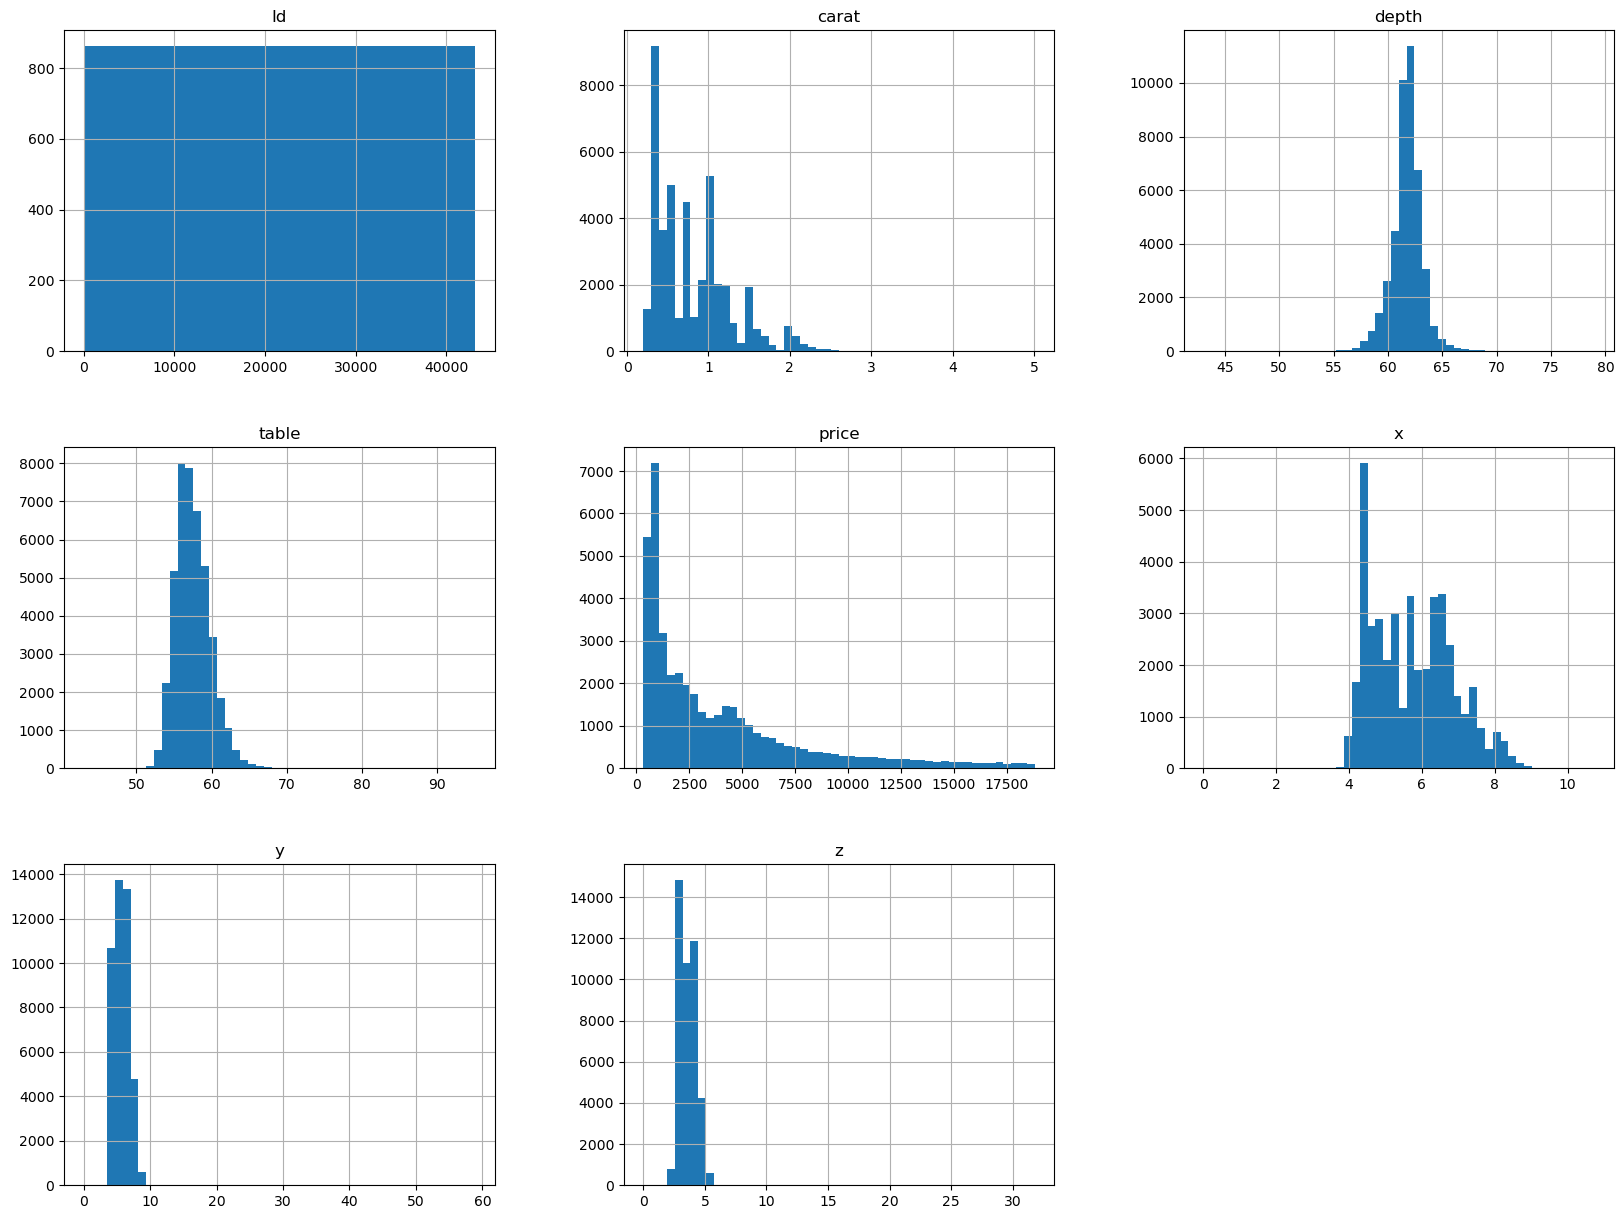

In [10]:
train.hist(figsize = (20,15),bins = 50)
plt.show()

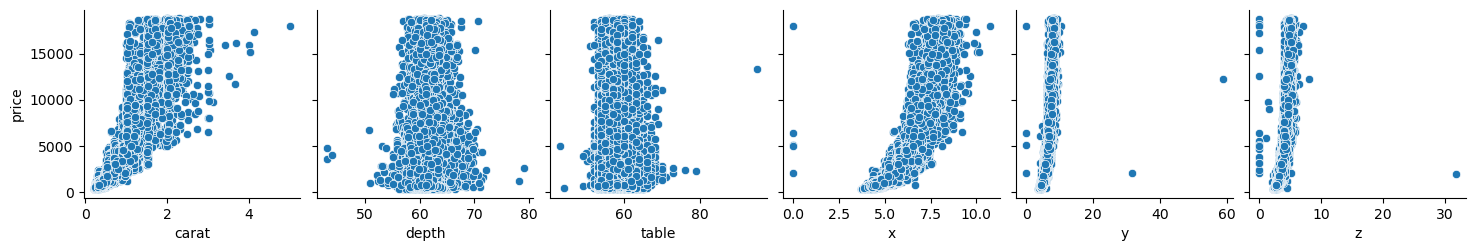

In [12]:
sns.pairplot(train, x_vars=["carat","depth","table", "x", "y", "z" ], y_vars=["price"])
plt.show()

In [13]:

train.drop(train[(train['y'] < 1) | (train['y'] > 20)].index, inplace=True)

In [14]:
train.drop(train[(train['x'] < 3) | (train['x'] > 10)].index, inplace=True)
train.drop(train[(train['z'] < 1) | (train['z'] > 10)].index, inplace=True)
train.drop(train[(train['carat'] > 14)].index, inplace=True)
train.drop(train[(train['table'] < 50) | (train['table'] > 80)].index, inplace=True)
train.drop(train[(train['depth'] < 50) | (train['depth'] > 80)].index, inplace=True)

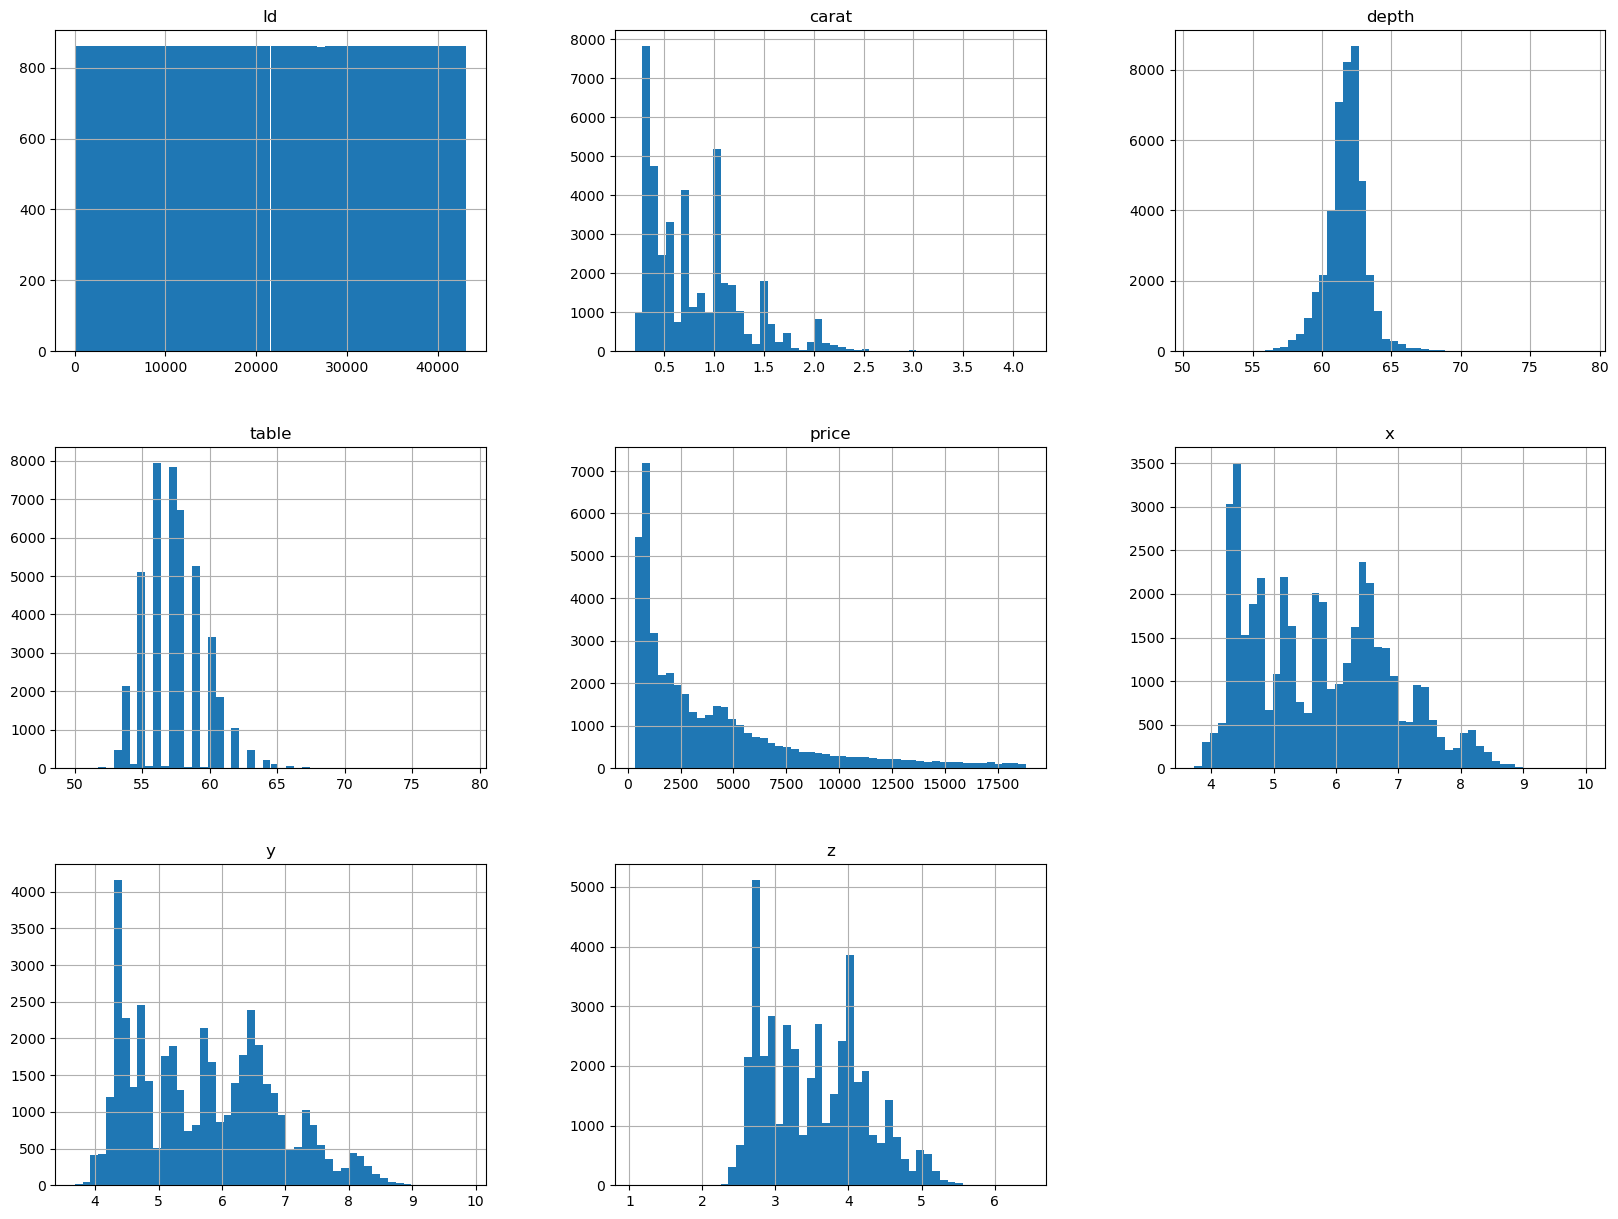

In [15]:
train.hist(figsize = (20,15),bins = 50)
plt.show()

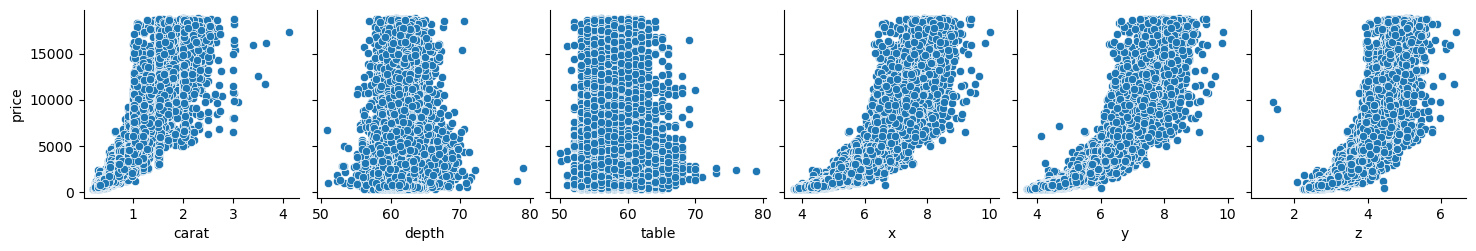

In [16]:
sns.pairplot(train, x_vars=["carat","depth","table", "x", "y", "z" ], y_vars=["price"])
plt.show()

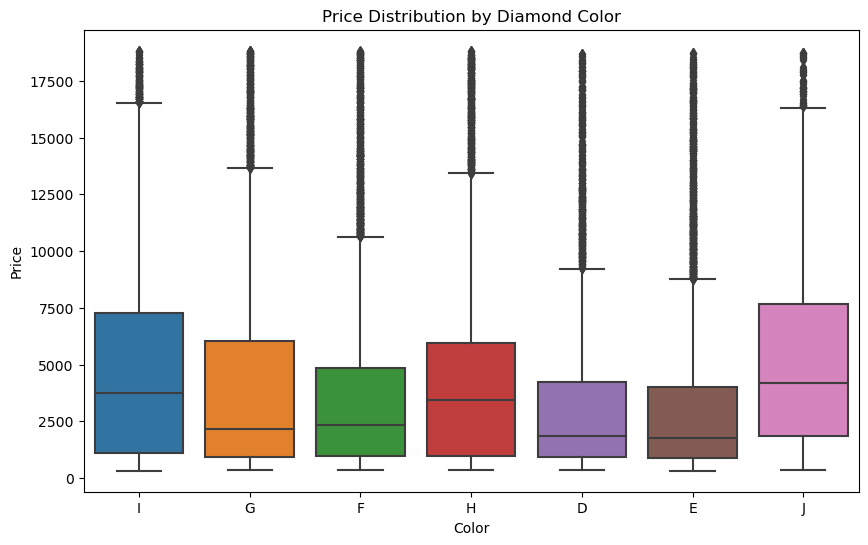

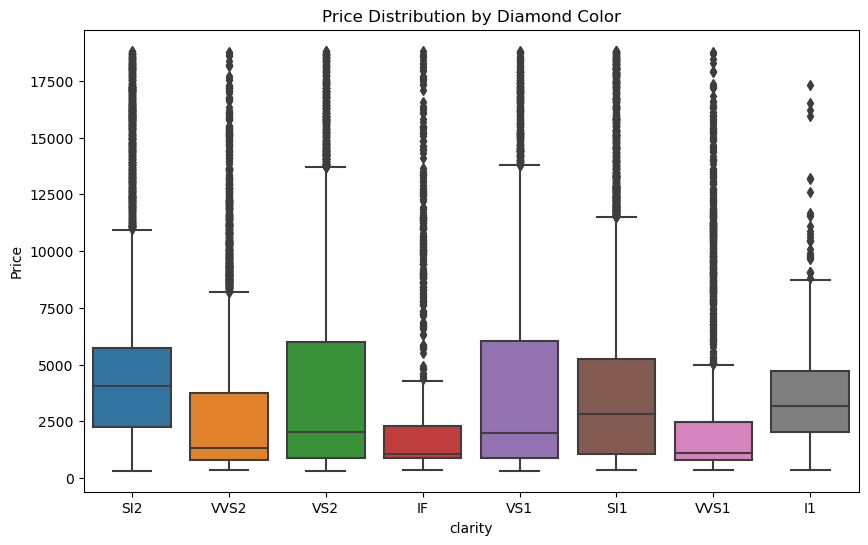

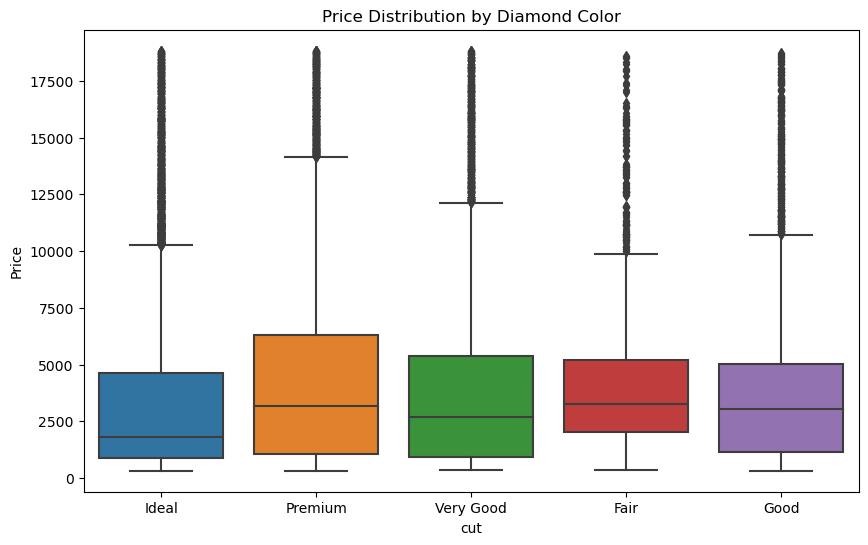

In [17]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='color', y='price', data=train)
plt.title('Price Distribution by Diamond Color')
plt.xlabel('Color')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='clarity', y='price', data=train)
plt.title('Price Distribution by Diamond Color')
plt.xlabel('clarity')
plt.ylabel('Price')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='cut', y='price', data=train)
plt.title('Price Distribution by Diamond Color')
plt.xlabel('cut')
plt.ylabel('Price')
plt.show()


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train["cut_num"] = le.fit_transform(train.cut)
train["color_num"] = le.fit_transform(train.color)
train["clarity_num"] = le.fit_transform(train.clarity)


In [19]:
train.drop(['cut', 'color', 'clarity'], axis=1, inplace=True)

In [20]:
train['Volume'] = train['x']*train['y']*train['z']

<AxesSubplot:>

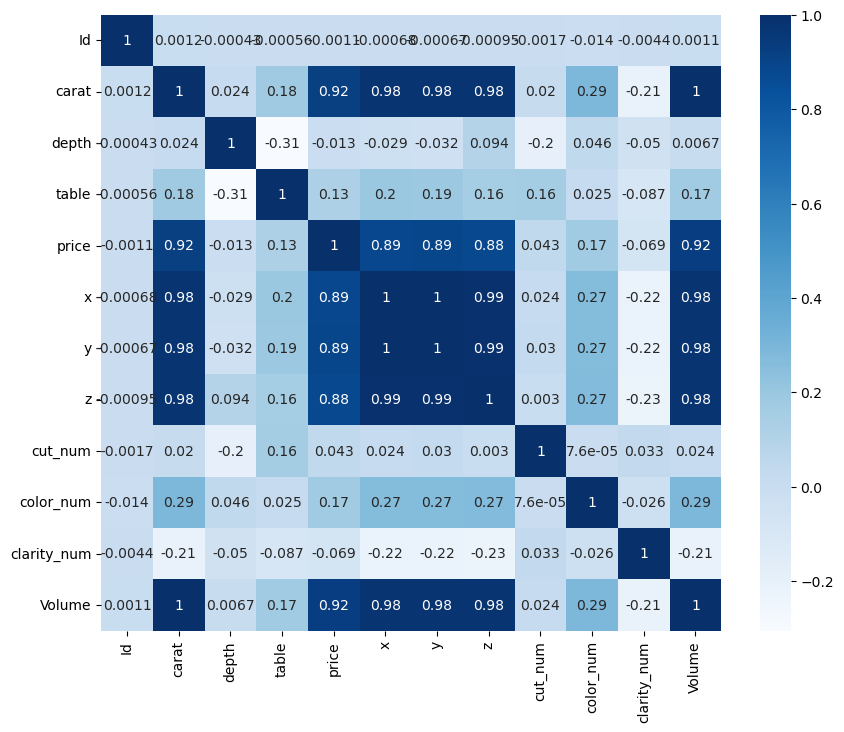

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(), annot=True, cmap='Blues')

In [22]:
train.head()

,Id,carat,depth,table,price,x,y,z,cut_num,color_num,clarity_num,Volume
0,1,1.06,61.8,57.0,4270,6.57,6.60,4.07,2,5,3,176.483340
1,2,1.51,60.9,58.0,15164,7.38,7.42,4.51,3,3,7,246.965796
2,3,0.32,61.3,56.0,828,4.43,4.41,2.71,2,2,5,52.943373
3,4,0.53,61.2,56.0,1577,5.19,5.22,3.19,2,3,5,86.422842
4,5,0.70,61.0,57.0,2596,5.76,5.72,3.50,3,4,7,115.315200


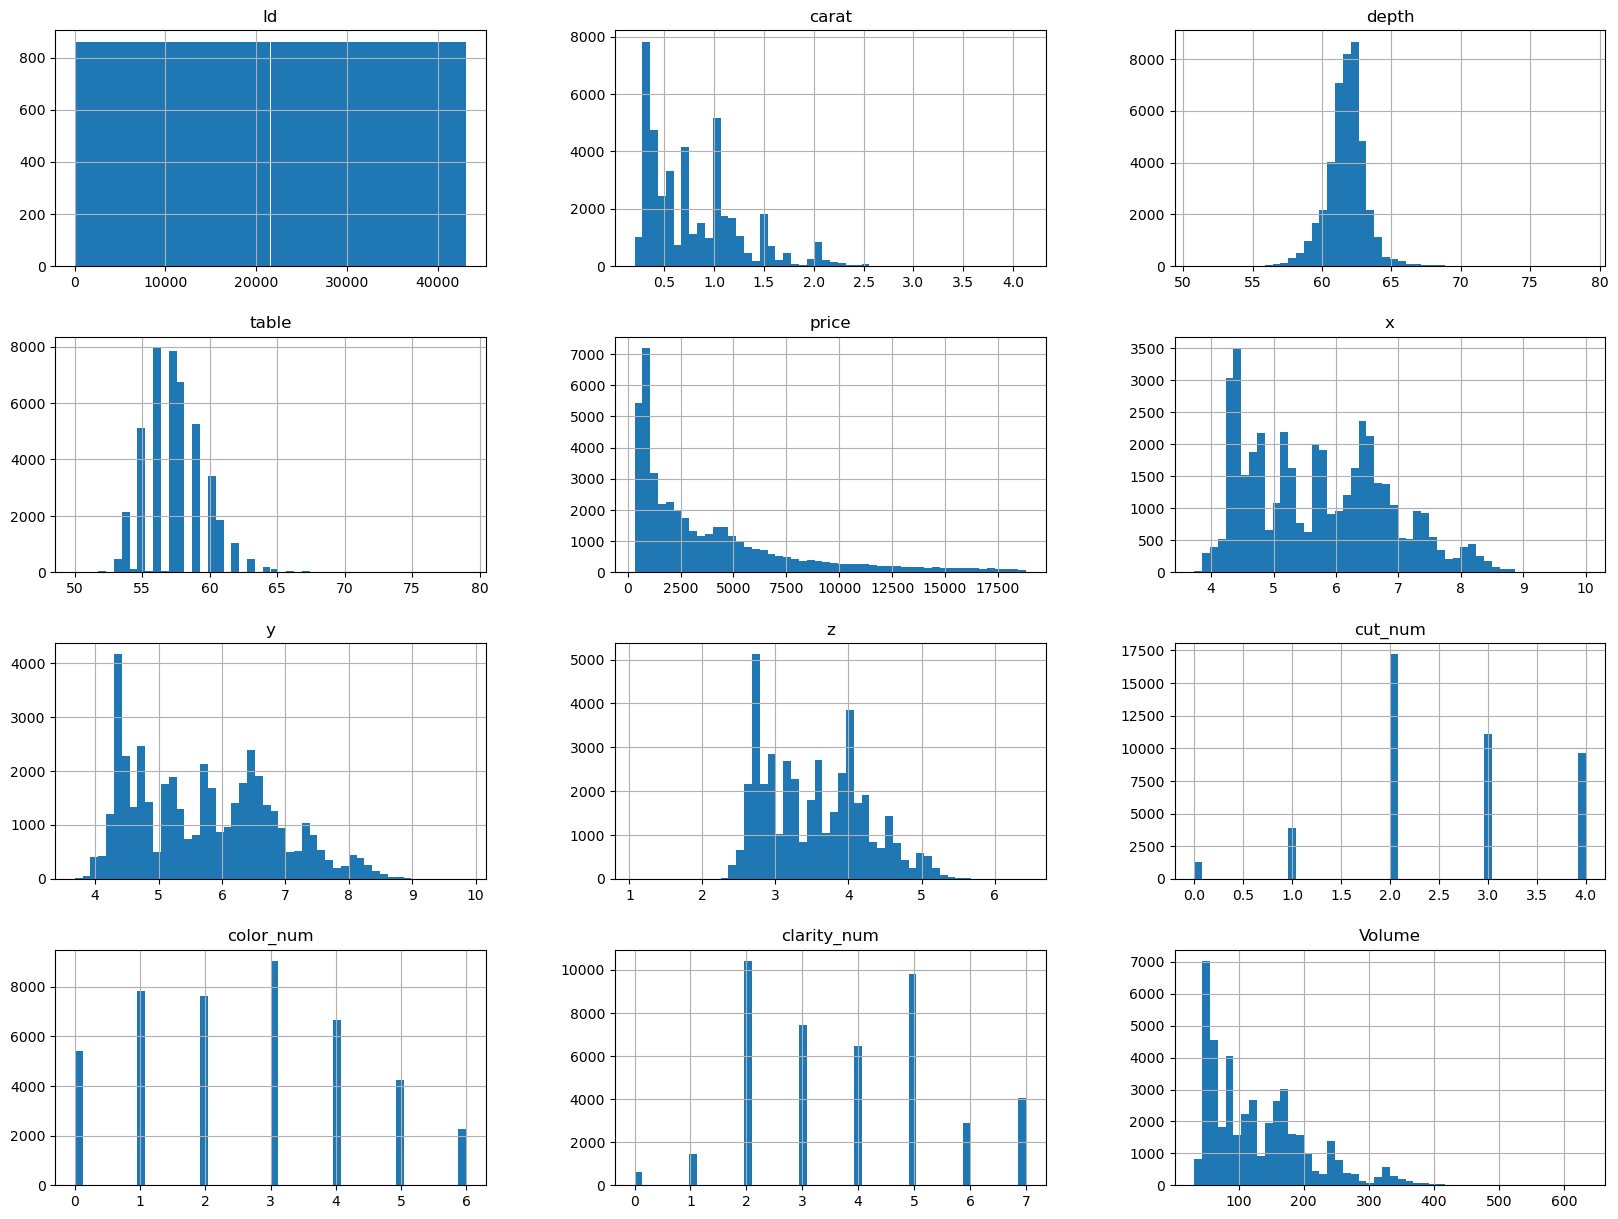

In [23]:
train.hist(figsize = (20,15),bins = 50)
plt.show()


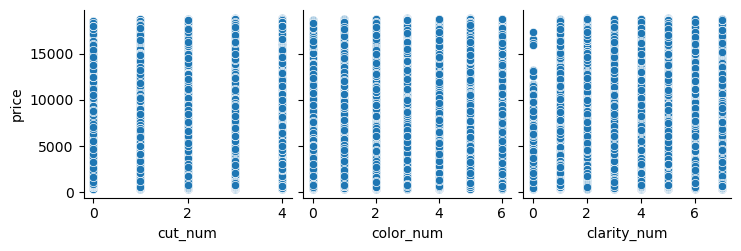

In [24]:
sns.pairplot(train, x_vars=["cut_num", "color_num", "clarity_num"  ], y_vars=["price"])
plt.show()

In [25]:
features = train.drop(['price', 'Id'], axis=1)

labels= train.price

In [26]:
print(features.shape)
print(labels.shape)

(43120, 10)
(43120,)


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(features, labels, test_size=0.2)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((34496, 10), (8624, 10), (34496,), (8624,))

In [28]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, root_mean_squared_error

In [29]:

models = {
    'XGBR': XGBRegressor(),
    'LGBMR': LGBMRegressor(verbose=-1),
    'DTR': DecisionTreeRegressor(),
    'LR': LinearRegression(),
    'RFR': RandomForestRegressor(),
}

xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
}
lgbm_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
}
linear_param_grid = {
    'n_jobs': [-1]
}
svr_param_grid = {
    'kernel': ['linear', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
}
dt_param_grid = {
    'max_depth': [3, 5],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
}
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
}

grid = {
    'XGBR': xgb_param_grid,
    'LGBMR': lgbm_param_grid,
    'DTR': dt_param_grid,
    'LR': linear_param_grid,
    'RFR': rf_param_grid,
}


In [30]:
import time

valid_scores=pd.DataFrame({'Classifer':models.keys(),
                        'RMSE': np.zeros(len(models)),
                        'R2 Score': np.zeros(len(models)),
                        'Training time': np.zeros(len(models))})

clf_best_params = models.copy()

i=0

for key, model in models.items():
    start = time.time()
    clf = GridSearchCV(estimator=model, param_grid=grid[key], n_jobs=-1, cv=None)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    valid_scores.iloc[i, 1]= root_mean_squared_error(y_valid, y_pred)
    valid_scores.iloc[i, 2]= r2_score(y_valid, y_pred)

    clf_best_params[key]=clf.best_params_

    stop = time.time()
    valid_scores.iloc[i, 3] = np.round((stop - start)/60, 2)


    i += 1

In [31]:
valid_scores

,Classifer,RMSE,R2 Score,Training time
0,XGBR,539.274665,0.982096,0.09
1,LGBMR,538.362140,0.982157,0.13
2,DTR,1085.832537,0.927414,0.02
3,LR,1351.592920,0.887535,0.00
4,RFR,1013.352704,0.936781,0.86


In [32]:
clf_best_params

{'XGBR': {'max_depth': 5, 'n_estimators': 100},
 'LGBMR': {'max_depth': 5, 'n_estimators': 200},
 'DTR': {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5},
 'LR': {'n_jobs': -1},
 'RFR': {'max_depth': 5, 'n_estimators': 100}}

In [33]:
lgbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

clf = GridSearchCV(LGBMRegressor(verbose= -1), param_grid=lgbm_param_grid, n_jobs= -1, cv= 5, scoring= 'r2')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)
print(f'rmse: {root_mean_squared_error(y_valid, y_pred)}')
print(f'{r2_score(y_valid, y_pred)}')

rmse: 535.3904869638349
0.9823532029918843


In [34]:
clf.best_params_

{'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 300,
 'reg_alpha': 0.5,
 'reg_lambda': 0.1}

In [35]:
lgbm_params = {'learning_rate': 0.05,
    'max_depth': 7,
    'n_estimators': 300,
    'reg_alpha': 0.1,
    'reg_lambda': 0.5}
lgbm = LGBMRegressor(**lgbm_params, verbose= -1)
lgbm.fit(features, labels)

LGBMRegressor(learning_rate=0.05, max_depth=7, n_estimators=300, reg_alpha=0.1,
              reg_lambda=0.5, verbose=-1)

In [36]:
test = pd.read_csv('test.csv')

test["cut_num"] = le.fit_transform(test.cut)
test["color_num"] = le.fit_transform(test.color)
test["clarity_num"] = le.fit_transform(test.clarity)

test.drop(['cut', 'color', 'clarity'], axis=1, inplace=True)
test['Volume'] = test['x']*test['y']*test['z']

test.drop(['Id'], axis=1, inplace= True)

In [37]:
predictions = lgbm.predict(test)

In [39]:
sub_df = pd.DataFrame(predictions, columns=['price'])
sub_df.to_csv('submission.csv', index= False)